# **TELECOM CUSTOMER CHURN PREDICTION**


Importing the required libraries

In [320]:
import pandas as pd # A library for data manipulation and analysis.
import seaborn as sns #A library for data visualization built on top of matplotlib.
import numpy as np #A library for numerical computing in Python.
from matplotlib import pyplot as plt#A module within the matplotlib library that provides a simple interface 
#for creating various types of plots, such as line plots, scatter plots, and bar charts.

Loding the dataset

In [321]:
#read_excel() function is used to read an Excel file and returns a DataFrame. 
df = pd.read_excel('/content/train.xlsx')

In [322]:
#df.head() function is used to display the first 5 rows of the pandas dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#DATA PREPROCESSING

In [323]:
#drop() method is used to remove rows or columns from a pandas dataframe
df = df.drop("customerID",axis=1)

In [324]:
#df.info() function is used to display information about the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [325]:
#converts the "TotalCharges" column in the pandas dataframe df from a string datatype to a numeric datatype
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [326]:
##df.info() function is used to display information about the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [327]:
#count the number of missing values in each column of the dataframe 
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [328]:
#selects all rows in the pandas dataframe df where the "TotalCharges" column contains a missing value (NaN).
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [329]:
#df.shape returns the number of rows and columns present in a dataframe
df.shape

(7043, 20)

In [330]:
#fills missing values in the "TotalCharges" column of a pandas dataframe with the median value of the column.
df.TotalCharges.fillna(df.TotalCharges.median(),inplace = True)

In [331]:
#df.dtypes is a pandas method that returns the data type of each column in a dataframe.
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#VISUALIZATION

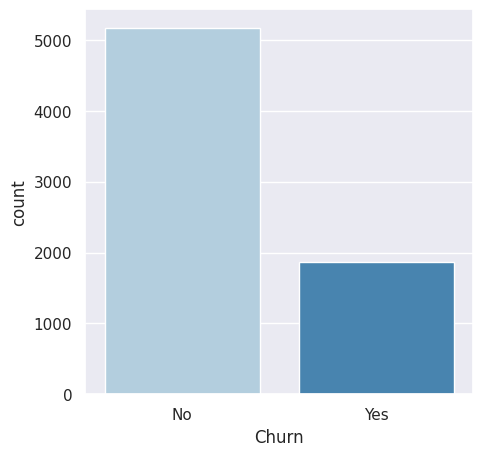

In [332]:
#creates a count plot using Seaborn library to visualize the distribution of a categorical variable 'Churn' in the dataframe
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['Churn'],palette='Blues',linewidth=1)
plt.show()

<Axes: ylabel='Churn'>

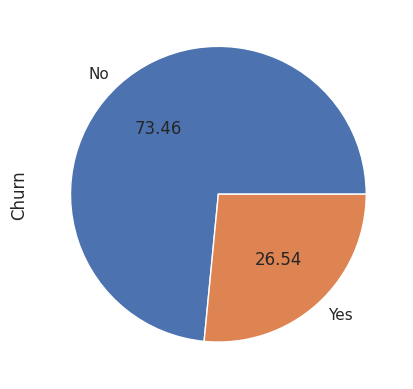

In [333]:
#code snippet creates a pie chart to visualize the distribution of a categorical variable 'Churn' in the dataframe
df['Churn'].value_counts().plot(kind="pie",autopct="%0.2f")

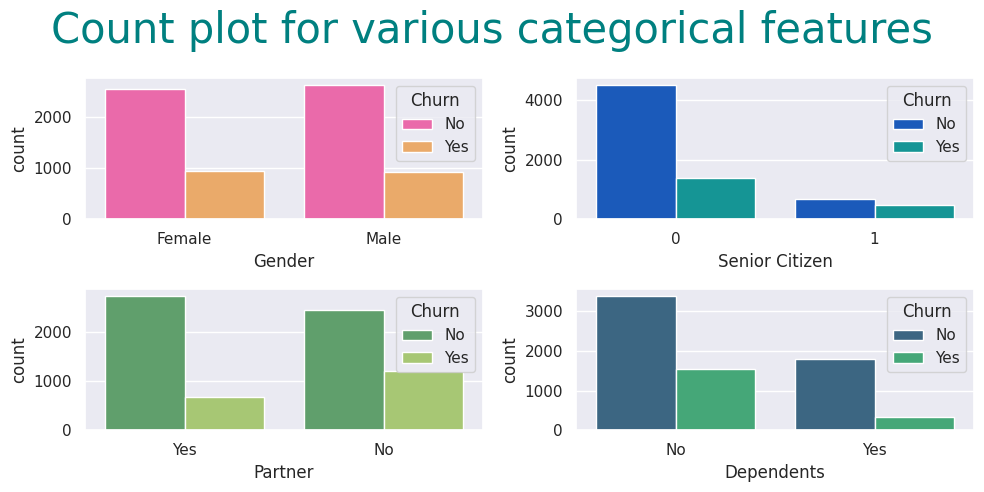

In [334]:
#code snippet creates a figure with 4 subplots, each of which shows a count plot for a different categorical feature in the 'df' dataframe.
#plt.suptitle() method sets a title for the entire figure.
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

Based on the above information, it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.

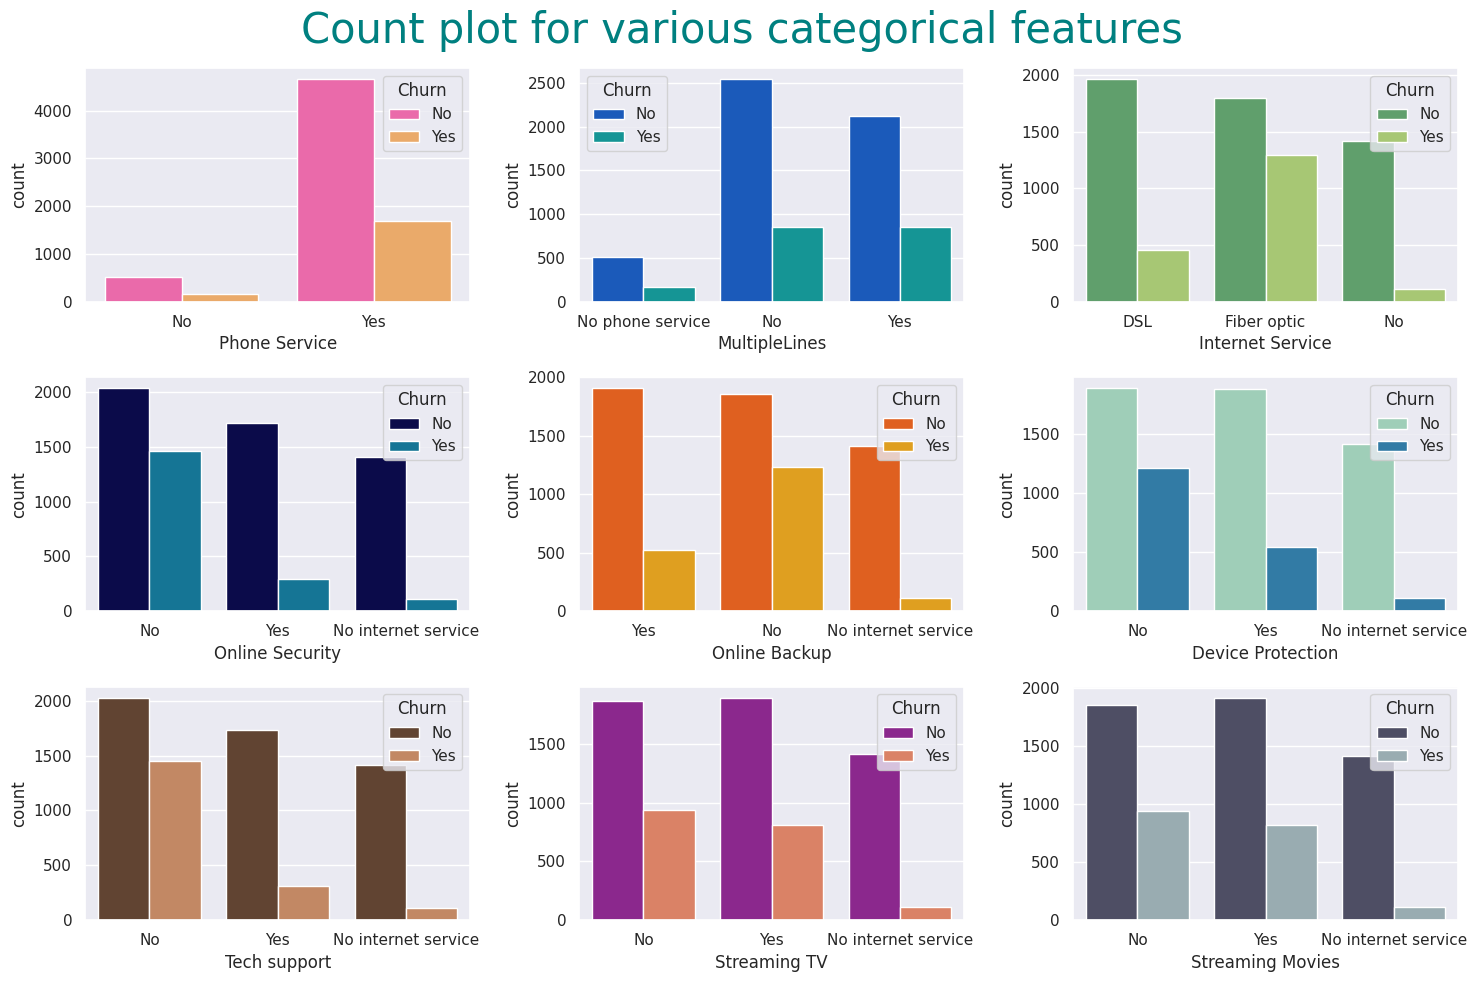

In [335]:
#creates a figure with 9 subplots, each of which shows a count plot for a different categorical feature in the 'df' dataframe.
fig, ax = plt.subplots(3, 3, figsize = (15,10))

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= df, hue= 'Churn', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'ocean')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 0], palette= 'copper')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()




*   Customer having fiber optic internet service are much more likely to churn then customers who dont
*   Customer without online security are more likely to churn
*   Customer without online backup are more likely to churn
*   Customer without device protection are more likely to churn
*   Customer without tech support are more likely to churn





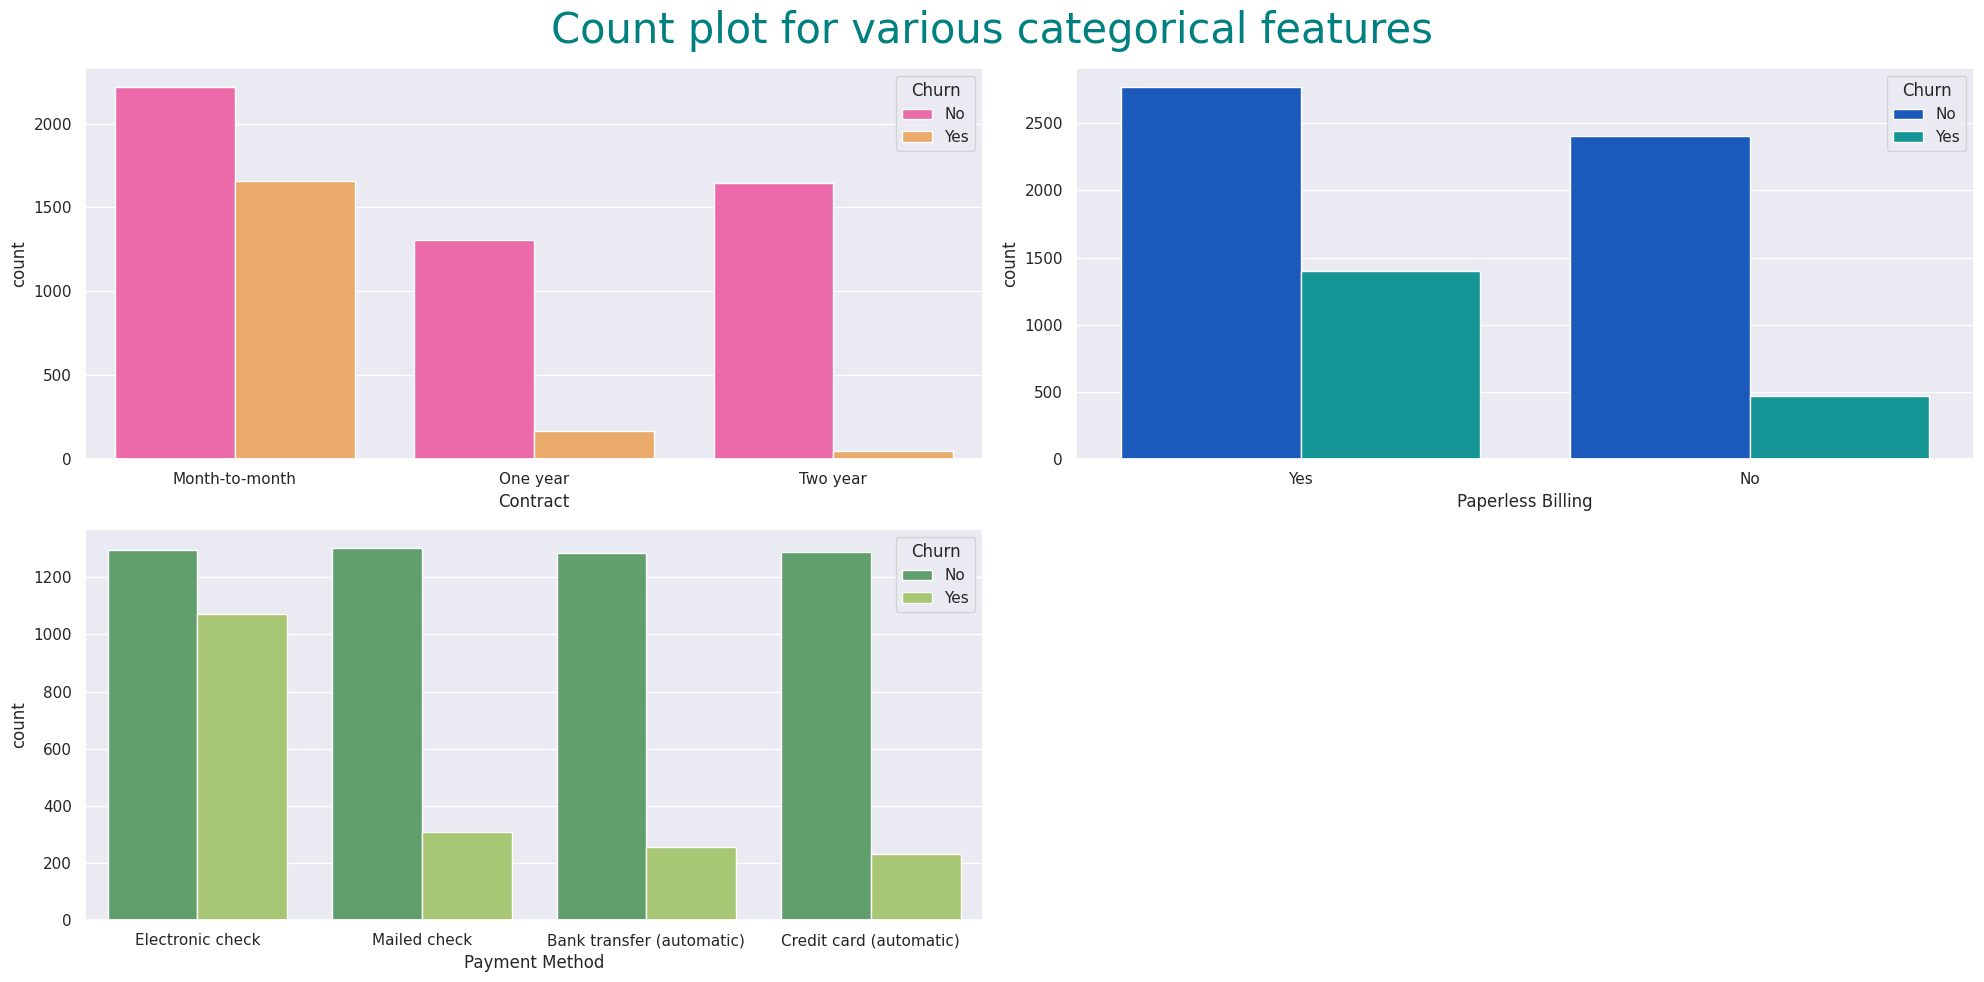

In [336]:
#Plots for categorical features in dataset 
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

we can see a pattern in the Tenure variable, where the largest amounts of value are at the minimum and maximum of the variable, when we look at the MonthlyCharge variable we can see that the vast majority of customers pay very little, but it doesn't happen the phenomenon of the more expensive the smaller the number of samples, when we look at the boxplots we can see that we do not have outliers.

<ipython-input-337-db09ad3f40fa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'], kde = False)
<ipython-input-337-db09ad3f40fa>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'], kde = False)


<Axes: xlabel='MonthlyCharges'>

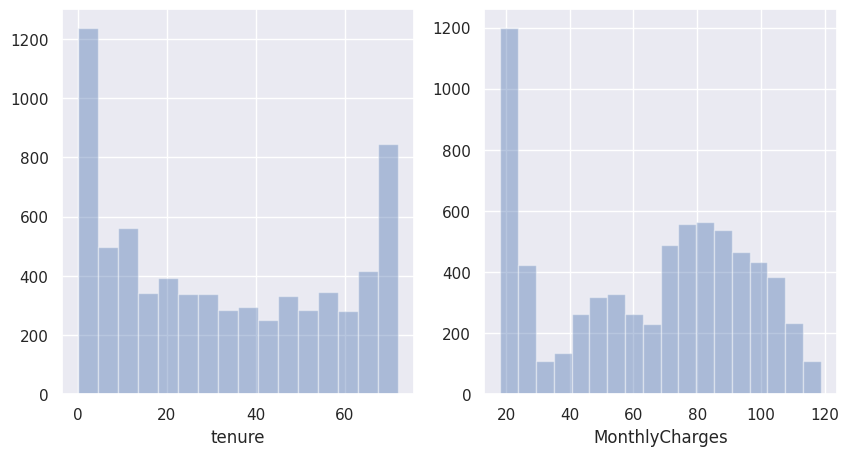

In [337]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(df['tenure'], kde = False)

plt.subplot(1,2,2)
sns.distplot(df['MonthlyCharges'], kde = False)

<Axes: xlabel='tenure'>

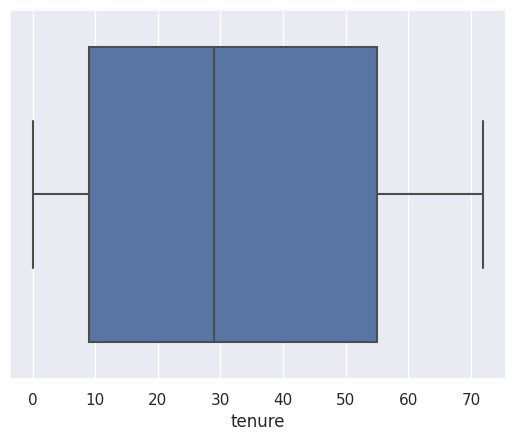

In [338]:
sns.boxplot(x=df["tenure"])

<Axes: xlabel='MonthlyCharges'>

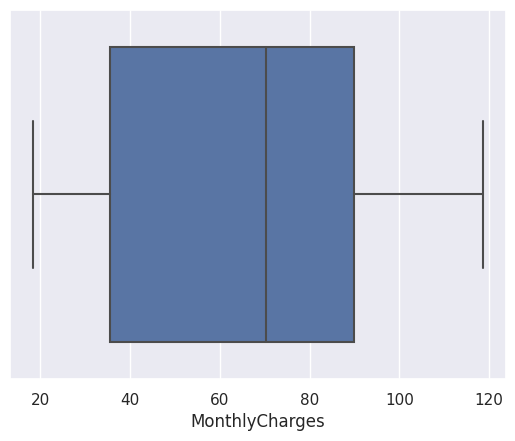

In [339]:
sns.boxplot(x=df["MonthlyCharges"])

In [340]:
#code snippet selects all the columns in the 'df' dataframe where the data type is 'object' and assigns them to a variable 'col'.
col = df.columns[df.dtypes=="object"]

In [341]:
#code snippet prints the unique values in each column of the dataframe 'df' where the data type is 'object'.
for i in col:
    un = df[i].unique()
    print("{} || {}".format(i,un))

gender || ['Female' 'Male']
Partner || ['Yes' 'No']
Dependents || ['No' 'Yes']
PhoneService || ['No' 'Yes']
MultipleLines || ['No phone service' 'No' 'Yes']
InternetService || ['DSL' 'Fiber optic' 'No']
OnlineSecurity || ['No' 'Yes' 'No internet service']
OnlineBackup || ['Yes' 'No' 'No internet service']
DeviceProtection || ['No' 'Yes' 'No internet service']
TechSupport || ['No' 'Yes' 'No internet service']
StreamingTV || ['No' 'Yes' 'No internet service']
StreamingMovies || ['No' 'Yes' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn || ['No' 'Yes']


In [342]:
#code snippet prints the frequency count of each unique value in each column of the dataframe 'df' where the data type is 'object'.
for i in col:
    un = df[i].value_counts()
    print("{} \n {} \n\n".format(i,un))

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 


Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 


Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 


PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 


MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 


InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 


OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 


DeviceProtection 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 


TechSupport 
 No                     3473
Yes             

In [343]:
#'col' variable contains a list of column names in the dataframe 'df' where the data type is 'object'.
col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [344]:
#returns the first 5 rows of the dataframe 'df' using the .head() method.
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [345]:
#code snippet uses the LabelEncoder class from the sklearn.preprocessing module to convert categorical variables in the dataframe 'df' to numeric format.
from sklearn.preprocessing import LabelEncoder
for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [346]:
##returns the first 5 rows of the dataframe 'df' using the .head() method.
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [347]:
#df.info() function is used to display information about the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


<Axes: >

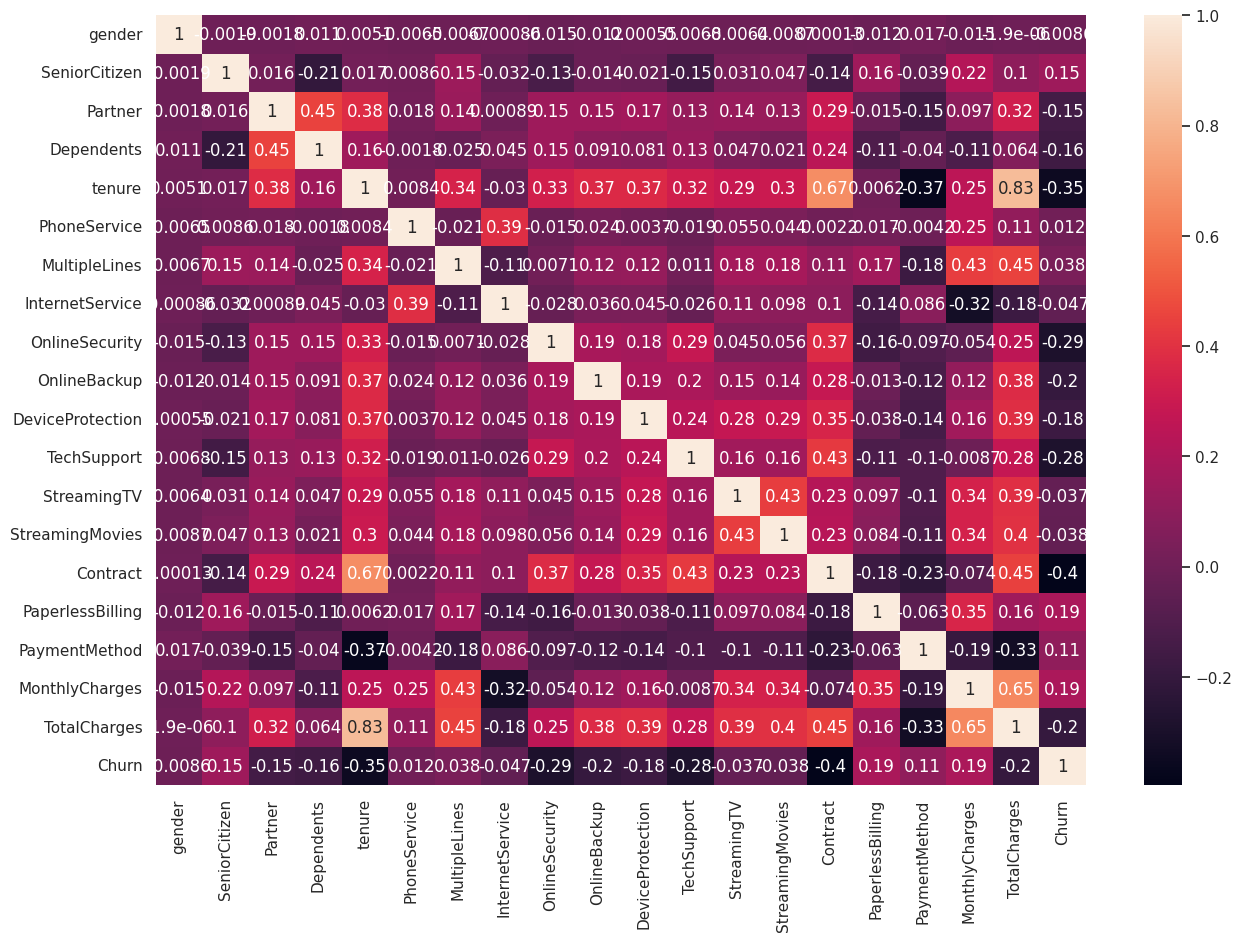

In [348]:
#code snippet uses the heatmap function from the seaborn module to plot a heatmap of the correlation matrix of the dataframe 'df
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [349]:
from imblearn.over_sampling import SMOTE

# Separate the target variable from the features
X = df.drop('Churn', axis=1)
y = df['Churn']

# Create an instance of SMOTE
smote = SMOTE()

# Fit and apply SMOTE
X_r, y_r = smote.fit_resample(X, y)


In [350]:
df1=pd.read_excel('test.xlsx')

In [351]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [352]:
col1 = df1.columns[df1.dtypes=="object"]

In [353]:
##code snippet prints the unique values in each column of the dataframe 'df' where the data type is 'object'.
for i in col1:
    un = df1[i].unique()
    print("{} || {}".format(i,un))

gender || ['Male' 'Female']
Partner || ['No' 'Yes']
Dependents || ['No' 'Yes']
PhoneService || ['Yes' 'No']
MultipleLines || ['No' 'No phone service' 'Yes']
InternetService || ['Fiber optic' 'DSL' 'No']
OnlineSecurity || ['Yes' 'No' 'No internet service']
OnlineBackup || ['no' 'Yes' 'No' 'No internet service']
DeviceProtection || ['yes' 'No' 'Yes' 'No internet service']
TechSupport || ['Yes' 'No' 'No internet service']
StreamingTV || ['Yes' 'No' 'No internet service']
StreamingMovies || ['Yes' 'No' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [354]:
#code snippet prints the frequency count of each unique value in each column of the dataframe 'df' where the data type is 'object'.
for i in col1:
    un = df1[i].value_counts()
    print("{} \n {} \n\n".format(i,un))

gender 
 Male      12
Female     8
Name: gender, dtype: int64 


Partner 
 No     13
Yes     7
Name: Partner, dtype: int64 


Dependents 
 No     17
Yes     3
Name: Dependents, dtype: int64 


PhoneService 
 Yes    14
No      6
Name: PhoneService, dtype: int64 


MultipleLines 
 No                  9
No phone service    6
Yes                 5
Name: MultipleLines, dtype: int64 


InternetService 
 DSL            10
Fiber optic     9
No              1
Name: InternetService, dtype: int64 


OnlineSecurity 
 No                     10
Yes                     9
No internet service     1
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 No                     9
Yes                    8
no                     2
No internet service    1
Name: OnlineBackup, dtype: int64 


DeviceProtection 
 No                     10
Yes                     7
yes                     2
No internet service     1
Name: DeviceProtection, dtype: int64 


TechSupport 
 No                     14
Yes                

In [355]:
#List of categorical columns
col1

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [356]:
# code snippet uses the LabelEncoder class from the sklearn.preprocessing module 
#to convert categorical variables in the dataframe 'df' to numeric format.
for i in col1:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

In [357]:
#applied the StandardScaler from scikit-learn on the feature matrix X. This scales the features so that each feature has a mean of 0 and a variance of 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

#SPLITTING INTO TRAIN AND TEST

In [358]:
#These lines of code split the data into training and testing sets. X_r is the feature set and y_r is the target variable. 
#train_size=0.75 indicates that 75% of the data will be used for training
#The training data is assigned to X_train and y_train, while the testing data is assigned to X_test and y_test.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_r,y_r,train_size=0.75,random_state=0)

#MODEL BUILDING

**Random Forest Classifier**

In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [360]:
#trains a Random Forest Classifier model on the training data.
#This will create a random forest classifier model, fit it to the training data,
model = RandomForestClassifier()
model.fit(X_train,y_train)
 #predict the churn values for the test data, and calculate the accuracy score.
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8500193274062621

In [361]:
confusion_matrix(y_test,y_pred)

array([[1070,  220],
       [ 168, 1129]])

In [362]:
#Extracting the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1290
           1       0.84      0.87      0.85      1297

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [363]:
import pickle
pickle_out = open("model_final.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

This code is creating a binary file named "mdl2.pkl" in write mode (wb) using the open() function. Then it is serializing the trained model object using the pickle.dump() function and writing it to the binary file. Finally, it is closing the file using the close() method. This binary file can be used later to load the trained model and use it for making predictions on new data.

In [364]:
#Prediction values for the test data for random forest algorithm
y_pred0=model.predict(df1)

In [365]:
y_pred0

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

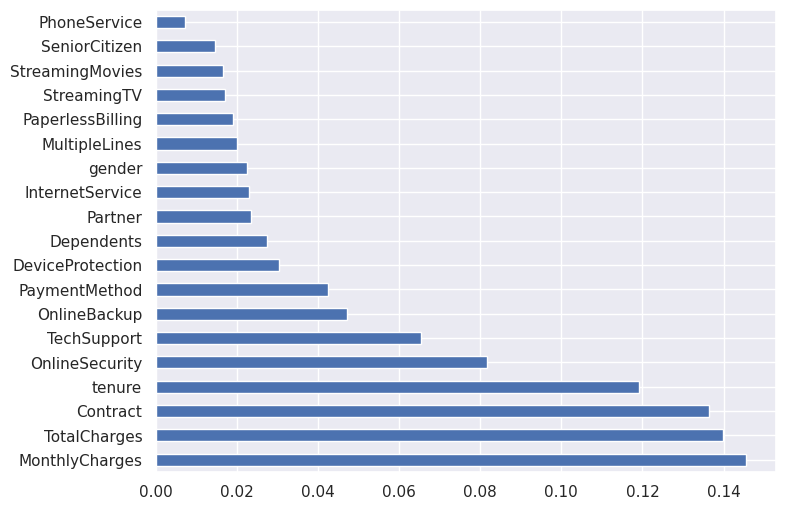

In [368]:
# plot graph of feature importances for better visualization 
plt.figure(figsize = (8,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**KNN CLASSIFICATION**

In [366]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.7700038654812524


In [367]:
confusion_matrix(y_test,y_pred)

array([[ 907,  383],
       [ 212, 1085]])

In [369]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1290
           1       0.74      0.84      0.78      1297

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587



In [370]:
#Prediction values for the test data for knn classification algorithm
y_pred1=knn.predict(df1)

In [371]:
y_pred1

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

**LOGISTIC REGRESSION**

In [372]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [373]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7982218786238887

In [374]:
#code to get confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 977,  313],
       [ 209, 1088]])

In [375]:
#Importing the required libraries of diffrent models
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [376]:
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGboost',XGBClassifier()))

In [377]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X_r,y_r, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.793600 
KNN: 0.757360 
RF: 0.847238 
NB: 0.777269 
SVM: 0.630825 
XGboost: 0.843376 


**Hyperparameter Tuning For Random forest classifier**

In [378]:
from sklearn.model_selection import GridSearchCV
model2 = RandomForestClassifier()
kfold = KFold(n_splits=20)
param = {"n_estimators":[50,100,150,200],"max_depth":[6,8,12]}
grid = GridSearchCV(model2,param_grid=param,cv=kfold)
grid_result = grid.fit(X_train,y_train)

Above code performs hyperparameter tuning using GridSearchCV on a Random Forest Classifier model. The hyperparameters tuned are n_estimators and max_depth. n_estimators represents the number of decision trees in the random forest model, and max_depth represents the maximum depth of each decision tree. The k-fold cross-validation technique with 20 splits is used for evaluating the performance of the model. The best combination of hyperparameters is selected by the GridSearchCV algorithm based on the mean cross-validated score.

In [379]:
#Returns the mean cross-validated score of the best_estimator which is the Random Forest model with hyperparameters selected by GridSearchCV.
grid_result.best_score_

0.8430601197890442

In [380]:
#code returns the best combination of hyperparameters for the Random Forest Classifier model found by the GridSearchCV algorithm.
grid_result.best_params_

{'max_depth': 12, 'n_estimators': 200}

**HYPERPARAMETER TUNING FOR KNN CLASSIFICATION**

In [381]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9,11,13,15], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Cross-validation score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score: ", test_score)


Best hyperparameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Cross-validation score:  0.7920371114105722
Test set score:  0.7993815229996134


**EXTRACTING THE FINAL PREDICTION FILE FOR THE KNN CLASSIFICATION**

In [382]:
#Adding the target column to the test dataframe
df1['churn'] = y_pred1

In [383]:
#Extracting the submission file 
df1.to_csv('submission_KNN.csv', index=False)

**EXTRACTING THE FINAL PREDICTION FILE FOR THE RANDOM FOREST CLASSIFIER**

In [384]:
#Adding the target column to the test dataframe
df1['churn'] = y_pred0

In [385]:
#Extracting the submission file 
df1.to_csv('submission_RF.csv', index=False)